# Examining KKBox data to look for initial findings and trends

### Questions
1. Do users who listen to more songs have higher chances to replay songs in general? Basically, is there any pattern for users who are more engaged?
2. Are there more chances that a user plays again a song if it is accessed from a specific screen or section in the aplication?
3. Based on song attributes, can we tell that some songs have more possibilites to be listened again?
    - Do users like (listen again) more long songs or short songs?
    - Do songs who belong to more than one genre have more possibilities to be listened again?
    - Are songs in one language listened more than others in other languages?
4. Do users who registered before have higher probability to listen songs again?


### Data
The dataset that is investigation has several data tables.

#### train.csv
- msno: user id
- song_id: song id
- source_system_tab: the name of the tab where the event was triggered. System tabs are used to - categorize KKBOX mobile apps functions. For example, tab my library contains functions to -manipulate the local storage, and tab search contains functions relating to search.
- source_screen_name: name of the layout a user sees.
- source_type: an entry point a user first plays music on mobile apps. An entry point could be album, online-playlist, song .. etc.
- target: this is the target variable. target=1 means there are recurring listening event(s) triggered within a month after the user’s very first observable listening event, target=0 otherwise .

#### songs.csv
The songs. Note that data is in unicode.

- song_id
- song_length: in ms
- genre_ids: genre category. Some songs have multiple genres and they are separated by |
- artist_name
- composer
- lyricist
- language

#### members.csv
user information.

- msno
- city
- bd: age. Note: this column has outlier values, please use your judgement.
- gender
- registered_via: registration method
- registration_init_time: format %Y%m%d
- expiration_date: format %Y%m%d

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import seaborn as sns
import math
import numpy as np

In [ ]:
#Loading clean train document
train=pd.read_csv('data/train_clean.csv')
print(train.head())

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7349234 entries, 0 to 7349233
Data columns (total 6 columns):
msno                  object
song_id               object
source_system_tab     object
source_screen_name    object
source_type           object
target                int64
dtypes: int64(1), object(5)
memory usage: 336.4+ MB


In [4]:
#List unique values in source_system_tab column
train.source_system_tab.unique()

array(['explore', 'my library', 'search', 'discover', 'radio',
       'listen with', 'notification', 'settings'], dtype=object)

In [5]:
#Count entries of each type of source_system_tab
songs_by_source_system_tab=train.source_system_tab.value_counts(dropna=False)

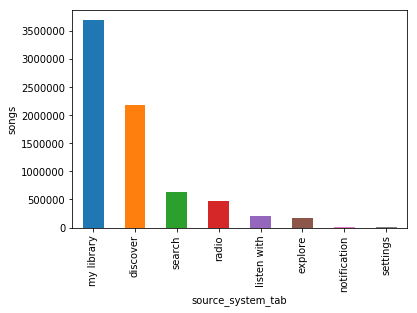

In [6]:
songs_by_source_system_tab.plot(kind='bar')
plt.ylabel('songs')
plt.xlabel('source_system_tab')
plt.show()

#Comments about source_system_tab column in train doc
- The most popular/accesible system tabs are 'my library' and 'discover'

In [7]:
#Count entries of each type of source_type
songs_by_source_type=train.source_type.value_counts(dropna=False)

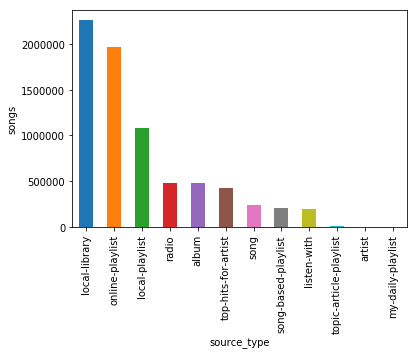

In [8]:
songs_by_source_type.plot(kind='bar')
plt.ylabel('songs')
plt.xlabel('source_type')
plt.show()

### Question 1
Do users who listen to more songs have higher chances to replay songs in general? Basically, is there any pattern for users who are more engaged?

In [9]:
#Number of unique users in the train data
train.msno.unique().shape

(30640,)

In [10]:
#Number of unique songs in the train data
train.song_id.unique().shape

(359415,)

There are 30755 unique users and 359966 unique songs in the train document.

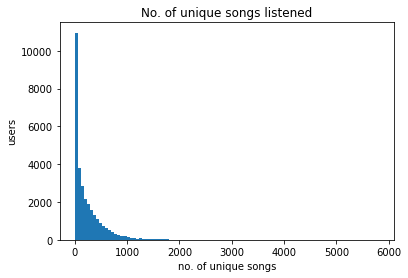

In [11]:
#Compute number of unique songs listened by user: songs_by_user
unique_songs_by_user=train.groupby('msno')['song_id'].count()
unique_songs_by_user.head()
#Plot histogram of number of unique songs listened by user
unique_songs_by_user.plot(kind='hist',bins=100)
plt.ylabel('users')
plt.xlabel('no. of unique songs')
plt.title('No. of unique songs listened')
plt.show()

Text(0,0.5,'no. of songs listened')

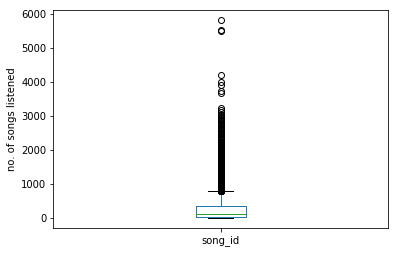

In [12]:
#Boxplot of number of unique songs listened by user
unique_songs_by_user.plot(kind='box')
plt.ylabel('no. of songs listened')

In [13]:
#Describe number of unique songs listened by users: songs_by_user
unique_songs_by_user.describe()

count    30640.000000
mean       239.857507
std        313.424707
min          1.000000
25%         28.000000
50%        128.000000
75%        340.000000
max       5819.000000
Name: song_id, dtype: float64

The median of unique songs listened by user is 128. There are many outliers in the graph that present the amount of songs listened by each user. These probably are highly engaged users, so it is interesting to investigate further how these users are interacting with the platform.

5819 is the maximum number of unique songs listened by a particular user. 

In [14]:
#Convert songs_by_user into a dataframe: songs_by_user_df
unique_songs_by_user_df=unique_songs_by_user.to_frame()
#Rename column: total_songs
unique_songs_by_user_df.columns=['total_songs']
unique_songs_by_user_df.head()

,total_songs
msno,
++5wYjoMgQHoRuD3GbbvmphZbBBwymzv5Q4l8sywtuU=,589
++AH7m/EQ4iKe6wSlfO/xXAJx50p+fCeTyF90GoE9Pg=,220
++e+jsxuQ8UEnmW40od9Rq3rW7+wAum4wooXyZTKJpk=,108
++xWL5Pbi2CpG4uUugigQahauM0J/sBIRloTNPBybIU=,16
+/SKX44s4ryWQzYzuV7ZKMXqIKQMN1cPz3M8CJ8CFKU=,222


In [15]:
#Merge train data with unique songs by user: train_2
train_2=pd.merge(train,unique_songs_by_user_df,left_on='msno',right_index=True)
train_2.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,total_songs
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,explore,online-playlist,1,5511
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,explore,online-playlist,1,5511
5,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,explore,explore,online-playlist,1,5511
7,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,bPIvRTzfHxH5LgHrStll+tYwSQNVV8PySgA3M1PfTgc=,explore,explore,online-playlist,1,5511
6707,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,XUz4Z4wPPChz+OIwkwj7HJ8teIjW3rEMdEATM80rDxM=,explore,explore,online-playlist,1,5511


In [16]:
#Compute total number of unique songs that have been replayed by each user: songs_replayed_by_user
songs_replayed_by_user=train.groupby('msno')['target'].sum().to_frame()
songs_replayed_by_user.columns=['total_replayed_songs']
songs_replayed_by_user.head()

,total_replayed_songs
msno,
++5wYjoMgQHoRuD3GbbvmphZbBBwymzv5Q4l8sywtuU=,293
++AH7m/EQ4iKe6wSlfO/xXAJx50p+fCeTyF90GoE9Pg=,141
++e+jsxuQ8UEnmW40od9Rq3rW7+wAum4wooXyZTKJpk=,76
++xWL5Pbi2CpG4uUugigQahauM0J/sBIRloTNPBybIU=,1
+/SKX44s4ryWQzYzuV7ZKMXqIKQMN1cPz3M8CJ8CFKU=,82


In [18]:
#Total songs and replayed songs: total_songs_study
total_songs_study=unique_songs_by_user_df.join(songs_replayed_by_user)
#Compute probability of replaying songs by user in replay_probability column
total_songs_study['replay_probability']=total_songs_study['total_replayed_songs']/total_songs_study['total_songs']
total_songs_study.head()

,total_songs,total_replayed_songs,replay_probability
msno,,,
++5wYjoMgQHoRuD3GbbvmphZbBBwymzv5Q4l8sywtuU=,589,293,0.497453
++AH7m/EQ4iKe6wSlfO/xXAJx50p+fCeTyF90GoE9Pg=,220,141,0.640909
++e+jsxuQ8UEnmW40od9Rq3rW7+wAum4wooXyZTKJpk=,108,76,0.703704
++xWL5Pbi2CpG4uUugigQahauM0J/sBIRloTNPBybIU=,16,1,0.062500
+/SKX44s4ryWQzYzuV7ZKMXqIKQMN1cPz3M8CJ8CFKU=,222,82,0.369369


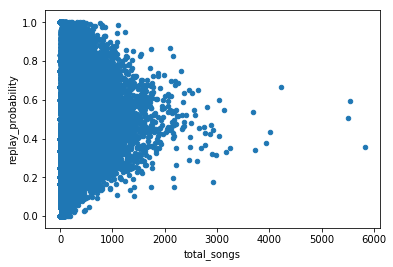

In [19]:
#Avg probability of replaying songs by user depending on the total unique songs listened
total_songs_study.plot.scatter(x='total_songs',y='replay_probability')

#### Conclusion
There is no correlation between the probability of listening again to a song and the amount of songs that a user has listened. 

It does not seem that highly engaged users will have higher chances to replay songs.

### Question 2
Are there more chances that a user plays again a song if it is accessed from a specific screen or section in the aplication?

In [20]:
#List how many entries there are of each type in source_screen_name
train.source_screen_name.value_counts(dropna=False)

local playlist more     3227698
online playlist more    1294413
radio                    474452
NaN                      444107
album more               419269
search                   298460
artist more              252427
discover feature         243979
discover chart           213570
others profile more      201795
discover genre            82201
my library                74829
explore                   72259
discover new              15955
search trends             13621
search home               13477
my library_search          6451
self profile more           212
concert                      47
payment                      12
Name: source_screen_name, dtype: int64

#Notes
- Unknown values have been replaced by NAN, so they are tagged under NAN in the previous list
- The amount of NAN values cannot be neglected (around 6.4%)
- 'Local playlist more' and 'Online playlist more' are the most popular/accesible source screens 

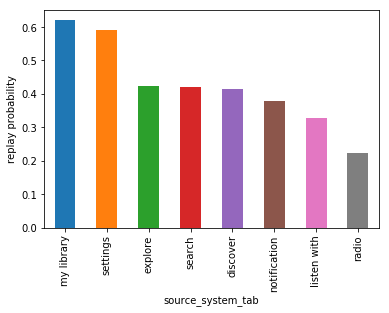

In [21]:
#Probability of a song to be played again depending on the source_system_tab
prob_by_source_system_tab=train.groupby(['source_system_tab'])['target'].mean().sort_values(ascending=False)
prob_by_source_system_tab.plot(kind='bar')
plt.ylabel('replay probability')
plt.show()

- It is more likely that a song will be played again if it was launched from 'my library' than if it was played from another tab. Although settings seems to have a high probability, there are very few users launching songs from this tab so it not representative.
- On the other hand, it is not very likely that a song will be played again if it was listened from radio tab.

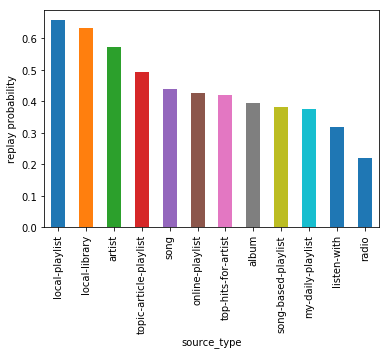

In [22]:
#Probability of a song to be played again depending on the source_type
prob_by_source_system_tab=train.groupby(['source_type'])['target'].mean().sort_values(ascending=False)
prob_by_source_system_tab.plot(kind='bar')
plt.ylabel('replay probability')
plt.show()

- It is more likely that a song will be played again if it was launched from 'local-playlist' or 'local-library' than if it was played from another type of source.
- On the other hand, as seen before it is not very likely that a song will be played again if it was listened from radio source_type.

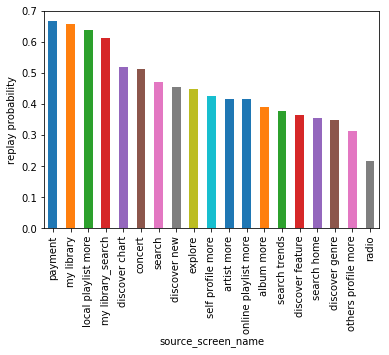

In [23]:
#Probability of a song to be played again depending on the source_screen_name
prob_by_source_system_tab=train.groupby(['source_screen_name'])['target'].mean().sort_values(ascending=False)
prob_by_source_system_tab.plot(kind='bar')
plt.ylabel('replay probability')
plt.show()

- It is more likely that a song will be played again if it was launched from 'my library', 'local playlist more' or 'my library_search' screens. 
- Payment screen has few observation so we can't draw conclusions from there. 
- On the other hand, it is not very likely that a song will be played again if it was listened from radio tab. 

In [24]:
#Show probabily of a song to be played again based on the source-type/source_screen combination
screen_type=train.groupby(['source_screen_name','source_type'])['target'].mean()
#Display source_type in columns and source_screen_name in rows
screen_type=screen_type.unstack()
#In order to plot data, NAN will be replaced by zeros
screen_type.fillna(0)

source_type,album,artist,listen-with,local-library,local-playlist,my-daily-playlist,online-playlist,radio,song,song-based-playlist,top-hits-for-artist,topic-article-playlist
source_screen_name,,,,,,,,,,,,
album more,0.390245,0.000000,0.000000,0.661784,0.757033,0.000000,0.507042,0.171488,0.444444,0.000000,0.000000,0.000000
artist more,0.216667,0.000000,0.000000,1.000000,0.000000,0.000000,0.427410,0.815166,0.444444,0.000000,0.416623,0.000000
concert,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.510638,0.000000,0.000000,0.000000,0.000000,0.000000
discover chart,0.052632,0.000000,0.250000,0.291667,0.000000,0.000000,0.517406,0.232143,1.000000,0.282609,0.000000,0.000000
discover feature,0.327134,0.000000,0.185379,0.582609,0.695473,0.344729,0.368433,0.506770,0.364444,0.357589,0.376812,0.000000
discover genre,0.280127,0.000000,0.000000,0.577778,1.000000,0.000000,0.353274,0.000000,0.500000,0.160714,0.000000,0.000000
discover new,0.271249,0.000000,0.000000,0.000000,1.000000,0.000000,0.480736,0.076923,0.666667,0.222222,0.000000,0.000000
explore,0.393513,0.000000,0.085271,0.435644,0.588710,0.000000,0.451428,0.066667,0.423105,0.916667,0.286735,0.558715
local playlist more,0.524102,0.563751,0.257732,0.630543,0.655580,0.576923,0.418799,0.282939,0.571429,0.374885,0.459293,0.000000


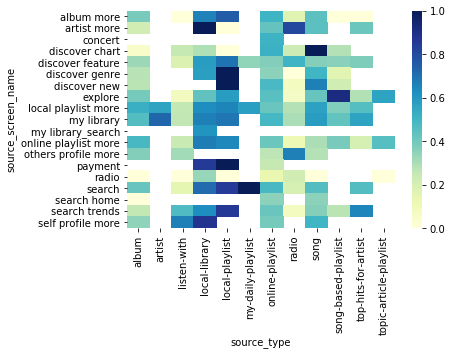

In [25]:
#Plot heatmap showing probability of re-play song based on the source-type/source_screen combination
sns.heatmap(screen_type, cmap="YlGnBu")

Songs that were accessed from Local-library and local-playlist source types have high chances to be re-played. These 2 types are the 1st and 3rd most popular among users. 

In this more detailed view, we can see that these 2 source types are performing good for most of the source screens.

In [26]:
#Show probabily of a song to be played again based on the source-system_tab/source_screen combination
system_screen=train.groupby(['source_system_tab','source_screen_name'])['target'].mean()
system_screen=system_screen.unstack()
system_screen.fillna(0)

source_screen_name,album more,artist more,concert,discover chart,discover feature,discover genre,discover new,explore,local playlist more,my library,my library_search,online playlist more,others profile more,payment,radio,search,search home,search trends,self profile more
source_system_tab,,,,,,,,,,,,,,,,,,,
discover,0.356544,0.371375,0.000000,0.516998,0.363363,0.347306,0.455031,0.142857,0.455486,0.324111,0.000000,0.421039,0.200507,0.500000,0.113656,0.431037,0.000000,0.347136,0.333333
explore,0.372320,0.361618,0.000000,0.000000,0.000000,0.000000,0.000000,0.448255,0.387884,0.000000,0.000000,0.409667,0.352273,0.000000,0.161240,0.421274,0.253012,0.310345,0.000000
listen with,0.360000,0.352500,0.465116,0.517647,0.205607,0.000000,0.857143,0.172414,0.528919,0.000000,0.000000,0.399881,0.314497,0.000000,0.443750,0.414258,0.000000,0.361446,0.522388
my library,0.423292,0.439718,1.000000,0.500000,0.458738,0.313253,0.761905,0.501229,0.640319,0.658295,0.611223,0.389315,0.331055,1.000000,0.219050,0.490570,0.318182,0.394853,0.381295
notification,0.410314,0.388889,0.000000,0.315789,0.137255,0.807692,0.500000,0.000000,0.452663,0.000000,0.000000,0.281341,0.392248,0.000000,0.000000,0.493333,0.000000,0.343750,0.000000
radio,0.320128,0.339339,0.000000,0.750000,0.652055,0.000000,0.000000,0.333333,0.386538,0.000000,0.000000,0.309839,0.404706,0.000000,0.217438,0.441667,0.000000,0.391892,0.000000
search,0.401083,0.422800,0.000000,0.650000,0.500000,0.000000,0.000000,0.377323,0.478897,0.000000,0.000000,0.365063,0.209967,0.000000,0.251524,0.474966,0.354810,0.000000,0.000000
settings,0.322148,0.000000,0.000000,0.631579,0.370370,0.533333,0.000000,0.000000,0.520305,0.000000,0.000000,0.322148,1.000000,0.571429,0.000000,0.355556,0.000000,0.333333,0.000000


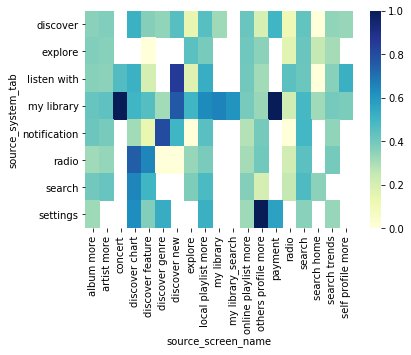

In [27]:
#Plot heatmap showing probability of re-play song based on the source-type/source_screen combination
sns.heatmap(system_screen, cmap="YlGnBu")

Before we already saw that my library was the source_system_tab with higher replay probability. Here we can see in which source screen names is higher. 

There are some system_tab, source_screen couples that are worth exploring further, to see if the high probability is driven by a low volumen or it can be a real driver for a song to be re-play.

In [28]:
#Show counts of source-system_tab/source_screen combinations
system_screen_counts=train.groupby(['source_system_tab','source_screen_name'])['target'].count()
system_screen_counts=system_screen_counts.unstack()
print(system_screen_counts)

source_screen_name  album more  artist more  concert  discover chart  \
source_system_tab                                                      
discover              141820.0      33314.0      NaN        213084.0   
explore                10029.0       1261.0      NaN             NaN   
listen with             1275.0        400.0     43.0            85.0   
my library            111800.0      27081.0      4.0           308.0   
notification            3122.0         54.0      NaN            19.0   
radio                   1868.0       1665.0      NaN            16.0   
search                149206.0     188652.0      NaN            20.0   
settings                 149.0          NaN      NaN            38.0   

source_screen_name  discover feature  discover genre  discover new  explore  \
source_system_tab                                                             
discover                    243005.0         81899.0       15922.0      7.0   
explore                          8.0      

The following source-system_tab/source_screen combination show high probability:
    - My library, Concert
    - Listen with, Discover New
    - Notification, Discover Genre
    - My library, Discover New
    - My library, Payment
    - Payment, Settings
    
But the number of occurrences it is very low for any of the combinations. The maximum number is observed for Notification, Discover Genre with 104.
No meaningful insights can be driven from here. 

The combinations that show a relatively high probability with significant volumen are:
    - My library, local playlist more
    - My library, my library
    - My library, my library search

In [29]:
#Show probabily of a song to be played again based on the source-system_tab/source_type combination
system_type=train.groupby(['source_system_tab','source_type'])['target'].mean()
system_type=system_type.unstack()
system_type.fillna(0)

source_type,album,artist,listen-with,local-library,local-playlist,my-daily-playlist,online-playlist,radio,song,song-based-playlist,top-hits-for-artist,topic-article-playlist
source_system_tab,,,,,,,,,,,,
discover,0.352418,0.891892,0.193109,0.507436,0.656369,0.375566,0.427084,0.142400,0.348064,0.380117,0.398697,0.209091
explore,0.382789,0.000000,0.267913,0.372453,0.707510,0.000000,0.427767,0.133333,0.339503,0.846154,0.389034,0.500973
listen with,0.362267,0.666667,0.321941,0.559693,0.601562,0.000000,0.395845,0.365854,0.281300,0.160920,0.385203,0.086957
my library,0.437544,0.568425,0.313898,0.635424,0.657703,0.000000,0.454019,0.227532,0.403690,0.470443,0.437672,0.649123
notification,0.409265,0.000000,0.400000,0.466216,0.500000,0.000000,0.312362,0.181818,0.381443,0.068966,0.333333,0.000000
radio,0.320128,1.000000,0.396270,0.375533,0.621951,0.000000,0.377599,0.219829,0.367123,0.700000,0.357790,0.222222
search,0.402182,0.000000,0.203777,0.474405,0.780161,0.000000,0.366803,0.277394,0.477586,0.666667,0.423450,0.423913
settings,0.329032,0.000000,0.000000,0.712000,0.750000,0.000000,0.368132,0.181818,0.250000,0.305556,0.379487,0.000000


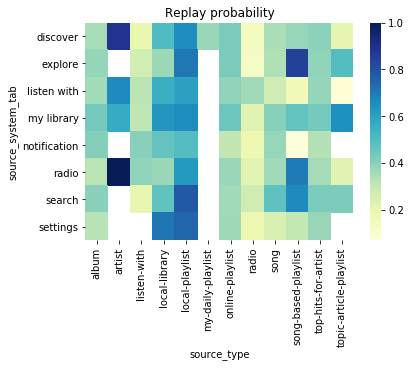

In [30]:
#Plot heatmap showing probability of re-play song based on the source_system_tab/source_type combination
sns.heatmap(system_type, cmap="YlGnBu")
plt.title('Replay probability')
plt.show()

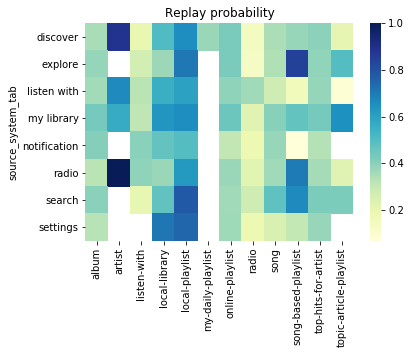

/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:1031: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


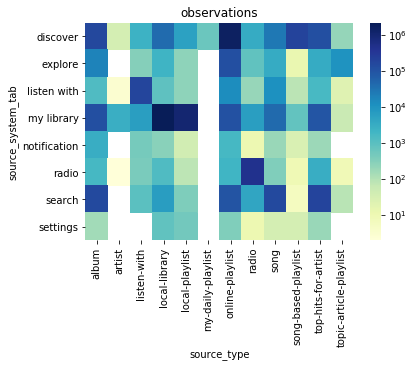

source_type           album  artist  listen-with  local-library  \
source_system_tab                                                 
discover           164529.0    37.0       2496.0        42226.0   
explore             18663.0     NaN        321.0         2258.0   
listen with          1394.0     3.0     181825.0          913.0   
my library         129932.0  2996.0       6260.0      2205014.0   
notification         3130.0     NaN        470.0          296.0   
radio                1868.0     2.0        429.0         1406.0   
search             157533.0     NaN       1006.0         6642.0   
settings              155.0     NaN          NaN          875.0   

source_type        local-playlist  my-daily-playlist  online-playlist  \
source_system_tab                                                       
discover                   5762.0              663.0        1597867.0   
explore                     253.0                NaN         127275.0   
listen with                 256.0    

In [31]:
#Plot heatmap showing probability of re-play song based on the source_system_tab/source_type combination
sns.heatmap(system_type, cmap="YlGnBu")
plt.xlabel('')
plt.title('Replay probability')
plt.show()
#Show counts of source-system_tab/source_type combinations
system_type_counts=train.groupby(['source_system_tab','source_type'])['target'].count()
system_type_counts=system_type_counts.unstack()
#In order to plot data, NAN will be replaced by zeros
system_type_counts.fillna(0)
#Compute logaritmic scale for plot colors
log_norm = LogNorm(vmin=system_type_counts.min().min(), vmax=system_type_counts.max().max())
#Generate logaritmic labels
cbar_ticks = [math.pow(10, i) for i in range(math.floor(math.log10(system_type_counts.min().min())), 1+math.ceil(math.log10(system_type_counts.max().max())))]
#Plot number of observations in logaritmic scale
#plt.subplot(2,1,2)
sns.heatmap(system_type_counts, cmap="YlGnBu", norm=log_norm, cbar_kws={"ticks": cbar_ticks})
plt.title('observations')
plt.show()
#Print number of observations
print(system_type_counts)

From combinations source_system_tab and source_type we see with a decent number of observation and high probability the combinations:
    - 'my library' | 'local-library'
    - 'my library' | 'local-playlist'

### Question 3

Based on song attributes, can we tell that some songs have more possibilites to be listened again?
- Do users like (listen again) more long songs or short songs?
- Do songs who belong to more genres have more possibilities to be listened again?
- Are songs in one language listened more than others in other languages?

In [32]:
#Loading songs clean file
songs=pd.read_csv('data/songs_clean.csv')
print(songs.head())
print(songs.shape)
print(songs.info())

                                        song_id  song_length_min genre_ids  \
0  CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=         4.127333   ['465']   
1  o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=         3.288800   ['444']   
2  DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=         3.863017   ['465']   
3  dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=         4.559233   ['465']   
4  W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=         2.338817   ['726']   

        artist_name                                  composer  \
0  張信哲 (Jeff Chang)                                    ['董貞']   
1         Blackpink  ['Teddy', 'Future Bounce', 'Bekuh Boom']   
2      Super Junior                                       NaN   
3             S.H.E                                   ['湯小康']   
4              貴族精選                           ['Traditional']   

          lyricist  language  genre_count  
0          ['何啟弘']         3          1.0  
1        ['Teddy']        31          1.0  
2       

In [33]:
#Calculate probability of each song to be replayed: prob_by_song
prob_by_song=train.groupby(['song_id'])['target'].mean().to_frame()
prob_by_song.head()

,target
song_id,
+++2AEoM0d8iZTdbnAjUm35bnGKGMXdZJSv4rrWK6JQ=,0.0
++/ACCkEN/+VtgrJxEqeRgRmV4y8pcarDJ9T/yRAi1E=,0.0
++/lJNswCU+za2pYB0cWIbGL5UzWIKtfweX20+GImZA=,0.0
++4/NK5qpbTZWln/6UmykB8cLfRTCCj8E36IKZVzBjM=,0.0
++4Ihbdp0juQ9ldp9DysOL1WTLHIiawg7cnBTn55I/k=,0.0


In [34]:
#Adding probability to be replayed to songs table: songs_with_prob
songs_with_prob=pd.merge(songs,prob_by_song,left_on='song_id',right_index=True)
songs_with_prob.head()

,song_id,song_length_min,genre_ids,artist_name,composer,lyricist,language,genre_count,target
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,4.127333,['465'],張信哲 (Jeff Chang),['董貞'],['何啟弘'],3,1.0,0.500000
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,3.288800,['444'],Blackpink,"['Teddy', 'Future Bounce', 'Bekuh Boom']",['Teddy'],31,1.0,0.613816
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,3.863017,['465'],Super Junior,NaN,NaN,31,1.0,0.478827
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,4.559233,['465'],S.H.E,['湯小康'],['徐世珍'],3,1.0,0.503125
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,2.338817,['726'],貴族精選,['Traditional'],['Traditional'],52,1.0,0.614035


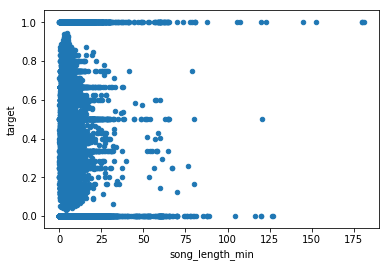

In [35]:
#Plot probability of each song to be replay depending on song_length 
songs_with_prob.plot.scatter(x='song_length_min',y='target')

There is no correlation between the song length and the replay probability.

Text(0,0.5,'replay probability')

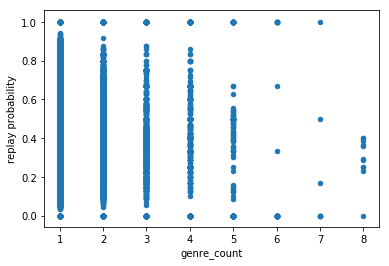

In [36]:
#Plot probability of each song to be replay depending on number of genres it belongs to 
songs_with_prob.plot.scatter(x='genre_count',y='target')
plt.ylabel('replay probability')

There is no clear correlation between the number of genre a song belongs to and the replay probability.

Text(0.5,1,'Replay probability by genre count')

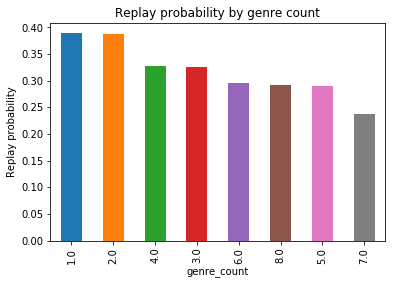

In [37]:
prob_by_genre_count=songs_with_prob.groupby('genre_count')['target'].mean().sort_values(ascending=False)
prob_by_genre_count.plot(kind='bar')
plt.ylabel('Replay probability')
plt.title('Replay probability by genre count')

Text(0.5,1,'Replay probability by language')

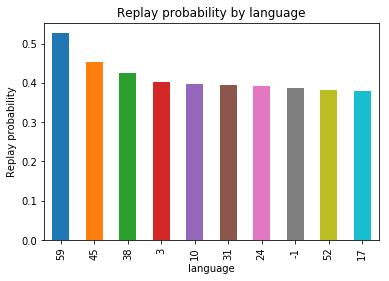

In [38]:
prob_by_language=songs_with_prob.groupby('language')['target'].mean().sort_values(ascending=False)
prob_by_language.plot(kind='bar')
plt.ylabel('Replay probability')
plt.title('Replay probability by language')

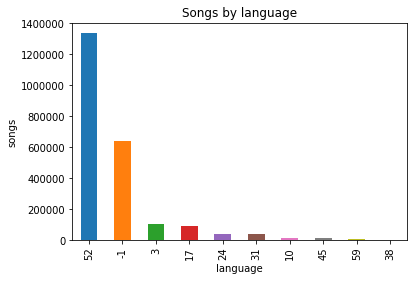

In [39]:
#Plot number of songs by language
songs_by_language=songs.groupby('language').song_id.count().sort_values(ascending=False)
songs_by_language.plot(kind='bar')
plt.title('Songs by language')
plt.ylabel('songs')
plt.show()

Language with high probability of replay seem to have less songs available. Let's investigate if there is any correlation.

In [40]:
#Merge no. of songs and probability by language
language_factor=pd.merge(songs_by_language.to_frame(),prob_by_language.to_frame(),on='language')
language_factor.columns=['no_of_songs','replay_prob']
print(language_factor)

          no_of_songs  replay_prob
language                          
 52           1336694     0.382069
-1             639468     0.385618
 3             106295     0.401937
 17             92518     0.378870
 24             41744     0.390727
 31             39201     0.395513
 10             15482     0.396162
 45             14435     0.453201
 59              8098     0.526921
 38              2385     0.425641


Text(0.5,0,'# of songs by language')

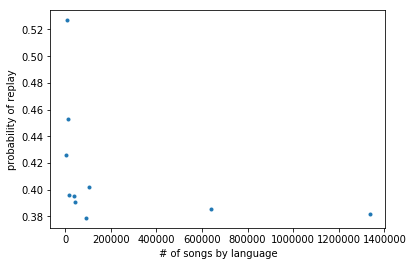

In [41]:
#Scatter plot: #songs vs. probability of being replayed for each of the languages
plt.plot(language_factor.no_of_songs,language_factor.replay_prob, marker='.',linestyle='none')
plt.ylabel('probability of replay')
plt.xlabel('# of songs by language')

It seems that languages with few songs available have a high replay probability, but there is not a clear trend or correlation.

In [42]:
members=pd.read_csv('data/members_clean.csv')
print(members.head())
print(members.shape)
print(members.info())

                                           msno  city  bd gender  \
0  XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=     1 NaN    NaN   
1  UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=     1 NaN    NaN   
2  D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=     1 NaN    NaN   
3  mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=     1 NaN    NaN   
4  q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=     1 NaN    NaN   

   registered_via registration_init_time expiration_date  
0               7             2011-08-20      2017-09-20  
1               7             2015-06-28      2017-06-22  
2               4             2016-04-11      2017-07-12  
3               9             2015-09-06      2015-09-07  
4               4             2017-01-26      2017-06-13  
(34402, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34402 entries, 0 to 34401
Data columns (total 7 columns):
msno                      34402 non-null object
city                      34402 non-null int64
bd                     

In [43]:
for item in ['registration_init_time','expiration_date']:
    members[item]=pd.to_datetime(members[item],format='%Y-%m-%d')
print(members.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34402 entries, 0 to 34401
Data columns (total 7 columns):
msno                      34402 non-null object
city                      34402 non-null int64
bd                        14439 non-null float64
gender                    14501 non-null object
registered_via            34402 non-null int64
registration_init_time    34402 non-null datetime64[ns]
expiration_date           34402 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2), object(2)
memory usage: 1.8+ MB
None


In [44]:
train_3=pd.merge(train,members,on='msno')
print(train_3.head())

                                           msno  \
0  FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   
1  FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   
2  FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   
3  FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   
4  FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   

                                        song_id source_system_tab  \
0  BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=           explore   
1  3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=           explore   
2  3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=           explore   
3  bPIvRTzfHxH5LgHrStll+tYwSQNVV8PySgA3M1PfTgc=           explore   
4  XUz4Z4wPPChz+OIwkwj7HJ8teIjW3rEMdEATM80rDxM=           explore   

  source_screen_name      source_type  target  city  bd gender  \
0            explore  online-playlist       1     1 NaN    NaN   
1            explore  online-playlist       1     1 NaN    NaN   
2            explore  online-playlist       1     1 NaN    NaN   
3            e

Notes:
- Most likely customer gender won't be a factor to decide whether a song is played again or not since this property has many NaN
- Registration_init_time and expiration_date need to be transform to datetime format

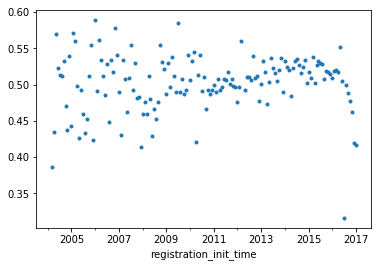

In [45]:
prob_by_user_registration_at=train_3.groupby(train_3['registration_init_time'].dt.to_period('M'))['target'].mean()
prob_by_user_registration_at.plot(marker='.',linestyle='none')

It does not seem to be a relationship between the registration_at 
and the probability for a user to replay songs 

## Conclusions

In this document we have tried to indentify factors that affect the probability of a song to be replayed. 

You could expect that highly engaged users are more likely to replay a song, but we have not found evidence that proves so. 

Also, it could be expected that users who have been using the service more will have higher changes to replay songs. We did not find any correlation between the registration date of the users and their probability to replay songs.

We have analysed some characteristics of the songs such as language, number of different genre that belongs to or duration.

We have not found any correlation between duration and replay probability nor no. of genres and replay probability. We did not observe any interesting patterns regarding song language.

Although we did not find any patterns in the previous factors, the screen/tab where the song is accessed from seems to play a role in the probability of a song to be replayed. Songs listened from 'My library' tab, which happens to be the most popular one, and source types 'local-library' and 'local-playlist' seems to have the highest chances to be replayed. On the other hand, songs listened from radio tab have the lowest chances to be replayed

It makes sense that users visit frequently playlists and songs that they are saving in their library. The company definetely should focus on teaching users how to build their playlist or save the songs in the library. 

It is also logical that songs listened from the radio tab are not listen that frequent since it is not the user who chooses what song is going to be played. 